## Method and Initial Results
### MACS 30100 Perspectives on Computational Modeling, Dr. Soltoff

Ellen Hsieh

In [1]:
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [2]:
# load the data
pfi_df = pd.read_csv('data/pfi_pu_pert.csv')

# drop out the home-schooling students
pfi_df = pfi_df[pfi_df.qtype != 1]

# create the dependent variable based on 'segbehav' and 'sebehavx' 
# which are time contacted about good behavior/behavior problems
pfi_df['percbehav'] = pfi_df['segbehav'] / (pfi_df['segbehav'] + pfi_df['sebehavx']) * 100

# fill the NaN with 0.5 (since the Nan are produced when the denominator equal to zero)
pfi_df['percbehav'] = pfi_df['percbehav'].fillna(50)

In [3]:
# the independent variables selected by literature reviews
selected_col = ['basmid', 'grade', 'hdhealth', 'camind', 'casian', 
                'cblack', 'cpaci', 'cwhite', 'chisprm', 'csex',
                'hhenglish', 'hhspanish', 'hhfrench', 'hhchinese',
                'hhothlang', 'P1REL', 'P1SEX', 'P1MRSTA', 
                'P1FRLNG', 'P1SPEAK', 'P1DIFFI', 
                'P1AMIND', 'P1ASIAN', 'P1BLACK', 
                'P1PACI','P1WHITE', 'P1HISPRM', 'P1EDUC', 
                'P1EMPL', 'P1HRSWK', 'P1MTHSWRK', 'P1AGE', 
                'P2GUARD','P2REL', 'P2SEX', 'P2MRSTA', 
                'P2FRLNG', 'P2SPEAK', 'P2DIFFI', 
                'P2AMIND', 'P2ASIAN', 'P2BLACK', 
                'P2PACI','P2WHITE', 'P2HISPRM', 'P2EDUC', 
                'P2EMPL', 'P2HRSWK', 'P2MTHSWRK', 'P2AGE',
                'ttlhhinc', 'scpubpri', 'sefuturex', 'fssportx', 
                'fsvol', 'fsmtng', 'fsptmtng', 'fsatcnfn', 
                'fsfundrs', 'fscommte', 'fscounslr', 'fsfreq', 
                'fsnotesx', 'fsphonchx', 'fhcheckx', 'fhhelp', 
                'FOSTORY2X', 'focrafts','fogames', 'fobuildx', 
                'fosport', 'forespon', 'fohistx', 
                'fodinnerx', 'folibrayx', 'fobookstx', 
                'foconcrtx','fomuseumx', 'fozoox', 
                'fogroupx', 'fosprtevx', 'percbehav']

# keep only the selected variable in the dataframe
pfi_df = pfi_df[selected_col]

In [4]:
# convert the sex variable into male = 0, female = 1
pfi_df['csex'] = pfi_df['csex'] - 1
pfi_df[['P1SEX','P2SEX']] = pfi_df[['P1SEX','P2SEX']] - 1 

# convert the child and parent characteristics binary variables into 0 and 1, replace all the No(=2) with 0
pfi_df[['camind', 'casian', 'cblack','cpaci', 'cwhite', 'chisprm',
        'hhenglish', 'hhspanish', 'hhfrench', 'hhchinese', 'hhothlang',
        'P1AMIND', 'P1ASIAN', 'P1BLACK', 'P1PACI','P1WHITE', 
        'P1HISPRM','P2AMIND', 'P2ASIAN', 'P2BLACK', 
        'P2PACI','P2WHITE', 'P2HISPRM']] = pfi_df[[
        'camind', 'casian', 'cblack','cpaci', 'cwhite', 'chisprm', 
        'hhenglish', 'hhspanish', 'hhfrench', 'hhchinese', 'hhothlang',
        'P1AMIND', 'P1ASIAN', 'P1BLACK', 'P1PACI','P1WHITE', 
        'P1HISPRM','P2AMIND', 'P2ASIAN', 'P2BLACK', 
        'P2PACI','P2WHITE', 'P2HISPRM']].replace(2, 0)

# convert the parent involvement binary variable into 0 and 1
pfi_df[['fssportx', 'fsvol', 'fsmtng', 
        'fsptmtng', 'fsatcnfn', 'fsfundrs', 'fscommte', 'fscounslr', 
        'fsnotesx', 'fsphonchx','FOSTORY2X', 'focrafts','fogames', 
        'fobuildx', 'fosport', 'forespon', 'fohistx', 'folibrayx', 
        'fobookstx', 'foconcrtx','fomuseumx', 'fozoox', 
        'fogroupx', 'fosprtevx']] = pfi_df[['fssportx', 'fsvol', 'fsmtng', 
        'fsptmtng', 'fsatcnfn', 'fsfundrs', 'fscommte', 'fscounslr', 
        'fsnotesx', 'fsphonchx','FOSTORY2X', 'focrafts','fogames', 
        'fobuildx', 'fosport', 'forespon', 'fohistx', 'folibrayx', 
        'fobookstx', 'foconcrtx','fomuseumx', 'fozoox', 
        'fogroupx', 'fosprtevx']].replace(2, 0)

# impute missing data in 'fhcheckx' and 'fhhelp' using mean
pfi_df[['fhcheckx']] = pfi_df[['fhcheckx']].replace(-1, 3)
pfi_df[['fhhelp']] = pfi_df[['fhhelp']].replace(-1, 3)

In [5]:
# only keep those child has two parents
pfi_df = pfi_df[pfi_df.P2SEX != -2]

# create the interest variable based on the cultural activiteis related variables 
pfi_df['culactiv'] = pfi_df['folibrayx'] + pfi_df['fobookstx'] + pfi_df['foconcrtx'] + \
                     pfi_df['fomuseumx'] + pfi_df['fozoox'] + pfi_df['fogroupx'] + pfi_df['fosprtevx']

In [6]:
pfi_df.head()

,basmid,grade,hdhealth,camind,casian,cblack,cpaci,cwhite,chisprm,csex,...,fodinnerx,folibrayx,fobookstx,foconcrtx,fomuseumx,fozoox,fogroupx,fosprtevx,percbehav,culactiv
0,20161000013,6,2,0,1,0,0,0,0,0,...,6,1,0,1,1,1,1,0,100.0,5
1,20161000017,12,2,0,0,0,0,1,0,0,...,5,0,0,1,0,0,1,1,50.0,3
2,20161000050,4,1,0,0,0,0,0,1,0,...,7,1,0,0,0,0,0,0,50.0,1
4,20161000058,12,2,0,0,0,0,1,0,1,...,5,0,0,0,0,0,1,1,50.0,2
5,20161000064,13,1,0,0,0,0,1,0,1,...,4,0,1,1,0,0,0,0,50.0,2


### Feature Selection 

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [8]:
# independent variables and dependent variable
X = pfi_df.drop(['percbehav', 'basmid', 'folibrayx', 'fobookstx', 
                 'foconcrtx','fomuseumx', 'fozoox', 
                 'fogroupx', 'fosprtevx', 'culactiv'], axis=1)
y = pfi_df['percbehav']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 5, 10, 20, 40, 80]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 10, 20, 40, 80], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(random_state=42)
# Random search of parameters, using 5 fold cross validation, 
# search across 50 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 10, 20, 40, 80], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [12]:
# hyperparameters for the best model
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [13]:
from sklearn.metrics import mean_squared_error

# ecaluate the base model and the best random forest model using MSE
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mse = mean_squared_error(test_labels, predictions)
    print('Model Performance')
    print('Mean Squared Error: {:0.4f}'.format(mse))
    
    return mse

base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_mse = evaluate(base_model, X_test, y_test)

Model Performance
Mean Squared Error: 880.9028


In [14]:
best_random = rf_random.best_estimator_
random_mse = evaluate(best_random, X_test, y_test)

Model Performance
Mean Squared Error: 798.2903


In [15]:
# best random forest regresor model
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [16]:
# fit the best random forest regresoor model with whole dataset
best_random.fit(X, y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=80,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [17]:
names = X.columns
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), best_random.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.0597, 'grade'), (0.0586, 'P2AGE'), (0.0575, 'P1AGE'), (0.0441, 'fsfreq'), (0.0415, 'sefuturex'), (0.0353, 'P1HRSWK'), (0.0352, 'ttlhhinc'), (0.0344, 'P2EDUC'), (0.0341, 'fodinnerx'), (0.034, 'P2HRSWK'), (0.0333, 'P1EDUC'), (0.0252, 'fhhelp'), (0.0249, 'fsphonchx'), (0.0236, 'csex'), (0.0228, 'fsvol'), (0.0188, 'fsnotesx'), (0.0186, 'focrafts'), (0.0181, 'hdhealth'), (0.0178, 'fhcheckx'), (0.0174, 'P1MTHSWRK'), (0.0161, 'P1EMPL'), (0.0158, 'fsfundrs'), (0.0149, 'fsptmtng'), (0.0137, 'P2EMPL'), (0.0136, 'FOSTORY2X'), (0.0133, 'P2MTHSWRK'), (0.0126, 'fohistx'), (0.0126, 'fogames'), (0.0125, 'fobuildx'), (0.0122, 'fscounslr'), (0.0117, 'fsatcnfn'), (0.0115, 'P2REL'), (0.0107, 'fscommte'), (0.0105, 'P1REL'), (0.0101, 'scpubpri'), (0.0101, 'fosport'), (0.0101, 'forespon'), (0.0098, 'P1SPEAK'), (0.0091, 'P2SEX'), (0.0087, 'P2SPEAK'), (0.0087, 'P1SEX'), (0.0075, 'P2FRLNG'), (0.0069, 'P1FRLNG'), (0.0065, 'fssportx'), (0.0057, 'P1MRSTA'), (0.0054, 'fsmtng'), (

In [18]:
# create feature importance dataframe
data = {'Feature': X.columns, 'Importance': best_random.feature_importances_}
feature_importances = pd.DataFrame(data).sort_values('Importance', ascending=False)

# table of ten most important features
feature_importances[:10]

,Feature,Importance
0,grade,0.059666
48,P2AGE,0.058565
30,P1AGE,0.057489
60,fsfreq,0.044090
51,sefuturex,0.041483
28,P1HRSWK,0.035303
49,ttlhhinc,0.035180
44,P2EDUC,0.034403
72,fodinnerx,0.034088
46,P2HRSWK,0.033953


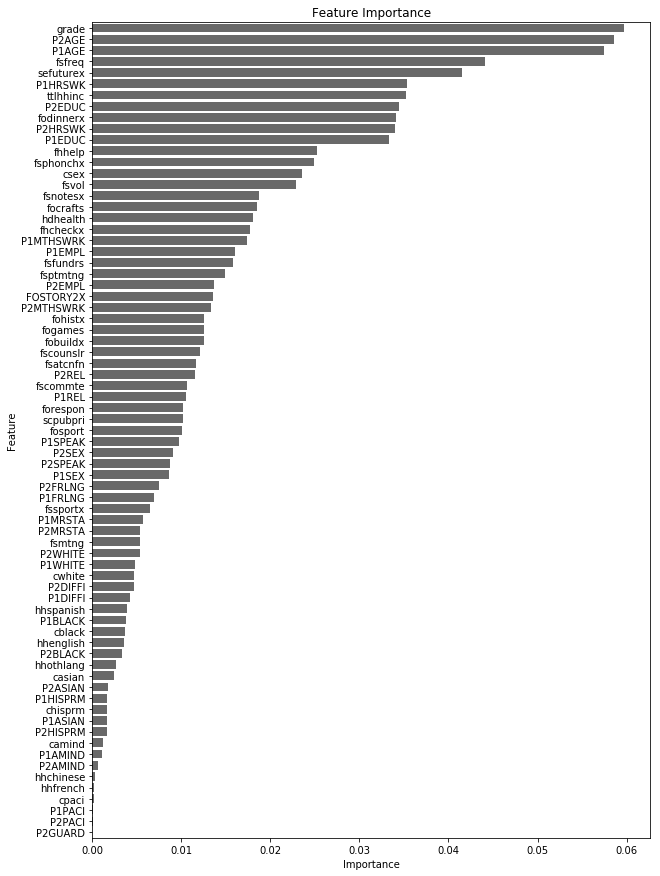

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
sns.barplot(x='Importance', y='Feature', data = feature_importances.sort_values('Importance', ascending = False), color='dimgrey')
plt.title('Feature Importance')
plt.show()

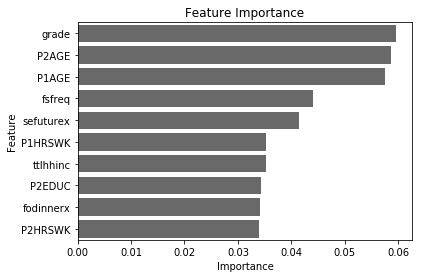

In [21]:
# plot the top ten important features
sns.barplot(x='Importance', y='Feature', data = feature_importances[:10].sort_values('Importance', ascending = False), color='dimgrey')
plt.title('Feature Importance')
plt.show()

In [22]:
# create top 10 importance features dataframe
best_feature_names = ['Grade attending', 'Second parent/guardian age', 'First parent/guardian age',  
                      'Times participated in school meetings', 'Expectations for child future education',
                      'First parent/guardian hours worked per week', 'Total income', 
                      'Second parent/guardian highest grade level completed',
                      'Days eaten the evening meal together in the past week',
                      'Second parent/guardian hours worked per week']
data_best = {'Feature': best_feature_names, 'Importance': feature_importances['Importance'][:10]}
feature_importances_top = pd.DataFrame(data_best).sort_values('Importance', ascending=False)

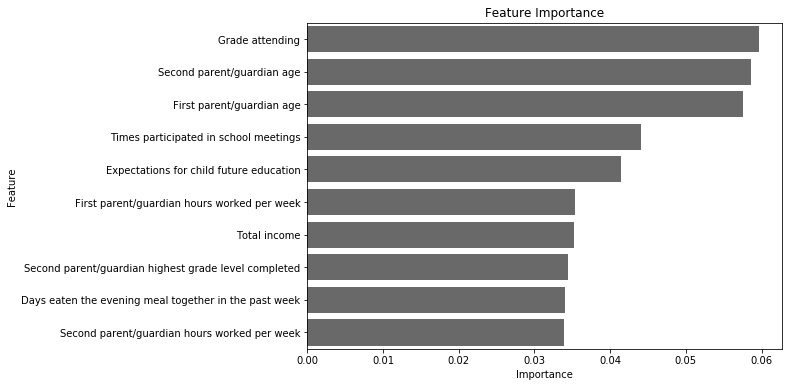

In [23]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8.5, 6

f = sns.barplot(x='Importance', y='Feature', data = feature_importances_top.sort_values('Importance', ascending = False), color='dimgrey') # , color='dimgrey'
plt.title('Feature Importance')
# fig = f.get_figure()
# fig.savefig('hist.png')
#sns_plot.savefig("output.png")
plt.savefig("output.png".format(f), bbox_inches='tight')
plt.show()

In [24]:
import statsmodels.formula.api as sm
result = sm.ols(formula="percbehav ~ grade + P2AGE + P1AGE + fsfreq + sefuturex + P1HRSWK + ttlhhinc + P2EDUC + fodinnerx + P2HRSWK + culactiv", data=pfi_df).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              percbehav   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     49.80
Date:                Tue, 18 Jun 2019   Prob (F-statistic):          2.28e-107
Time:                        11:52:47   Log-Likelihood:                -47665.
No. Observations:               10003   AIC:                         9.535e+04
Df Residuals:                    9991   BIC:                         9.544e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.0254      2.503     18.386      0.0

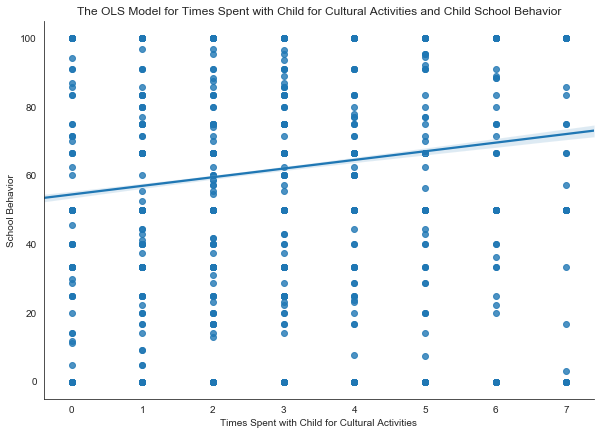

In [25]:
sns.set_style("white")
sns.lmplot(x="culactiv", y="percbehav", data=pfi_df, height=6, aspect=8.5/6);
#sns.regplot(x="culactiv", y="percbehav", data=pfi_df);
plt.title('The OLS Model for Times Spent with Child for Cultural Activities and Child School Behavior')
plt.xlabel('Times Spent with Child for Cultural Activities')
plt.ylabel('School Behavior')
plt.show()

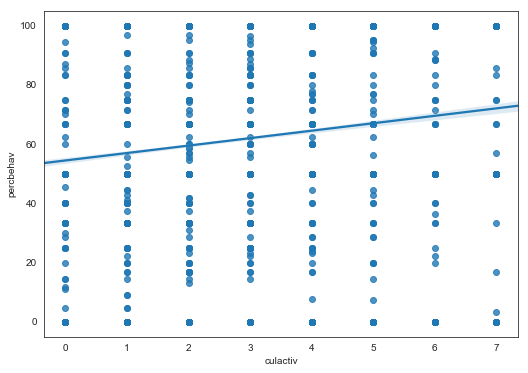

In [26]:
sns.regplot(x="culactiv", y="percbehav", data=pfi_df);

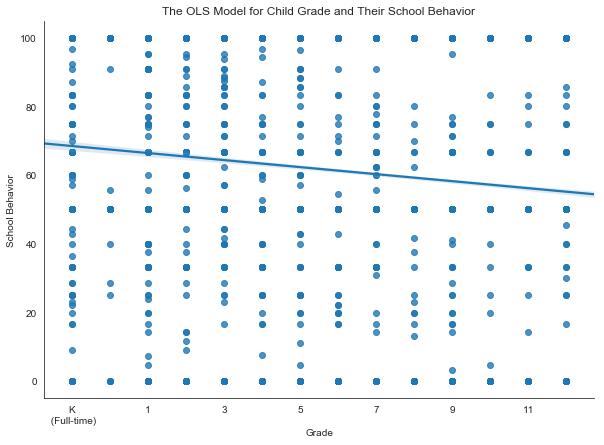

In [27]:
sns.set_style("white")
x_names = [0, 'K\n (Full-time)', '1', '3', '5', '7', '9', '11']
ax = sns.lmplot(x="grade", y="percbehav", data=pfi_df, height=6, aspect=8.5/6).set(xticklabels=x_names)
plt.title('The OLS Model for Child Grade and Their School Behavior')
plt.xlabel('Grade')
plt.ylabel('School Behavior')
plt.show()

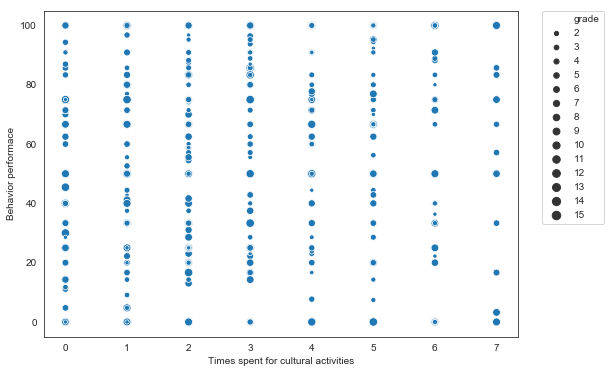

In [28]:
sns.scatterplot(x="culactiv", y="percbehav", size="grade", legend="full", data=pfi_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Times spent for cultural activities')
plt.ylabel('Behavior performace')
plt.show()

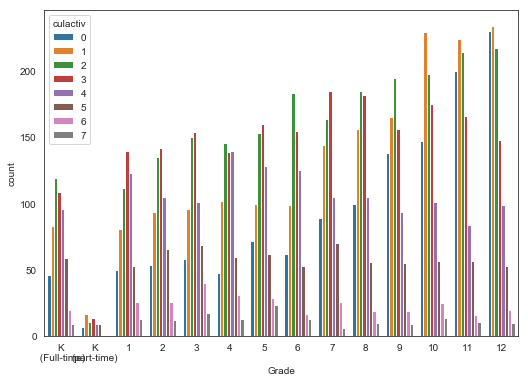

In [29]:
ax = sns.countplot(x="grade", hue="culactiv", data=pfi_df)
x_names = ['K\n (Full-time)', 'K\n(part-time)', '1', '2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12']
ax.set(xticklabels=x_names, xlabel='Grade')
plt.show()

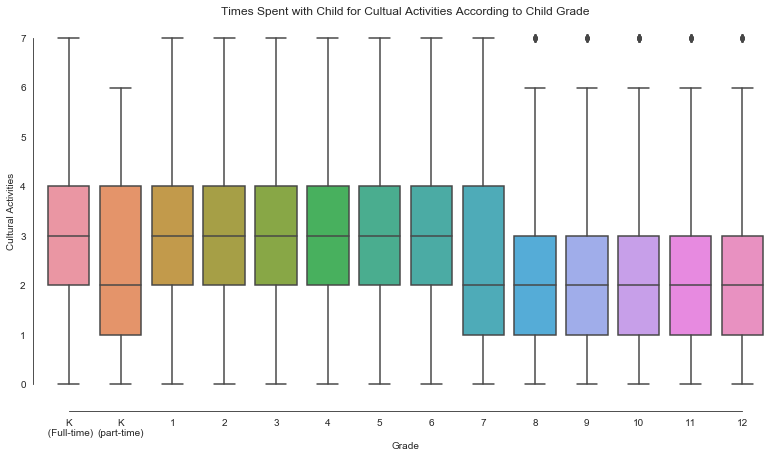

In [30]:
rcParams['figure.figsize'] = 13, 7
ax = sns.boxplot(x="grade", y="culactiv",
            data=pfi_df)
x_names = ['K\n (Full-time)', 'K\n(part-time)', '1', '2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12']
ax.set(xticklabels=x_names, ylabel='Cultural Activities', xlabel='Grade')
plt.title('Times Spent with Child for Cultual Activities According to Child Grade')
sns.despine(offset=10, trim=True)

In [31]:
feature_names = ['Grade attending', 'Second parent/guardian age', 'First parent/guardian age',  
                      'Times participated\n in school meetings', 'Expectations for\n child future education',
                      'First parent/guardian\n hours worked per week', 'Total income', 
                      'Second parent/guardian\n highest grade level completed',
                      'Days eaten the evening meal\n together in the past week',
                      'Second parent/guardian\n hours worked per week', 'Time spent with child\n for cultural activities']

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_coefficients(model, ci=95):
    """
    Plots coefficients and their confidence intervals for a statsmodels OLS
    model. Based on (but heavily modified and simplified) 
    seaborn's now deprecated coefplot.
    See 
    https://github.com/mwaskom/seaborn/blob/master/seaborn/regression.py

    Args:
        model: statsmodels OLS model
            model whose params and confidence intervals to plot
        ci: float, optional
            size of confidence intervals

    Returns:

    """
    # Get basic information to prepare the plot
    alpha = 1 - ci / 100
    coefs = model.params[1:]
    cis = model.conf_int(alpha)
    n_terms = len(coefs)

    # Figure out the dimensions of the plot
    h, w = mpl.rcParams["figure.figsize"]
    f, ax = plt.subplots(1, 1, figsize=(
    n_terms * (1 / 2), n_terms * (h / (4 * (n_terms / 5)))))
    for i, term in enumerate(coefs.index):
        low, high = cis.loc[term]
        ax.plot([low, high], [i, i], solid_capstyle="round", lw=2.5,
                color='black')
        ax.plot(coefs.loc[term], i, "o", ms=8, color='black')
    ax.set_ylim(-.5, n_terms - .5)
    ax.set_yticks(range(n_terms))
    plt.setp(ax.get_lines(), linewidth=2)
    coef_names = feature_names
    ax.set_yticklabels(coef_names)
    plt.setp(ax.get_xticklabels(), rotation=0)
    ax.axvline(x=0, linestyle='--', color='black', linewidth=1)
    plt.xlabel('Coefficient', fontsize=13)
    plt.tick_params(labelsize=14)
    f.savefig('reg_result.png', bbox_inches='tight')
    plt.title('')

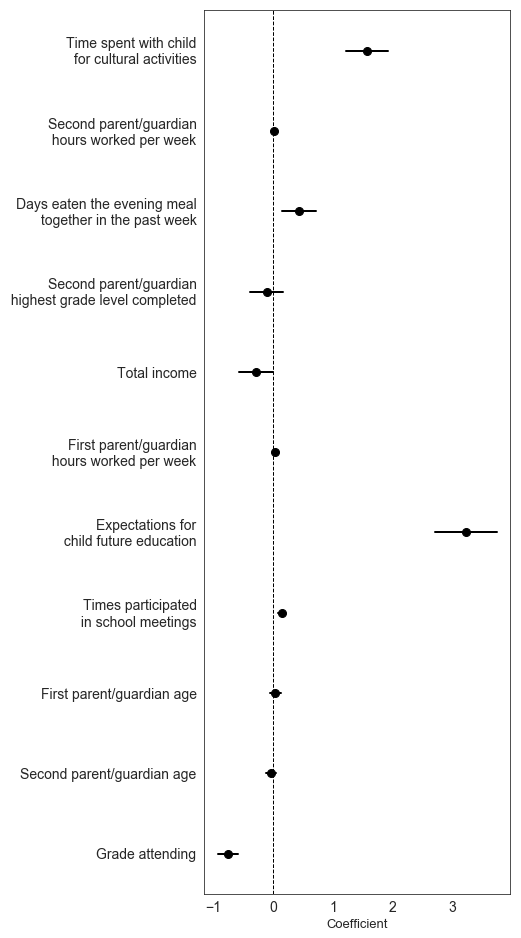

In [33]:
plot_coefficients(result)

In [34]:
err_series = result.params - result.conf_int()[0]
err_series

Intercept    4.907020
grade        0.168112
P2AGE        0.087859
P1AGE        0.092638
fsfreq       0.060877
sefuturex    0.518086
P1HRSWK      0.030351
ttlhhinc     0.284288
P2EDUC       0.271006
fodinnerx    0.283839
P2HRSWK      0.031443
culactiv     0.352432
dtype: float64

In [35]:
coef_df = pd.DataFrame({'coef': result.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-0.763861,0.168112,grade
1,-0.034211,0.087859,P2AGE
2,0.038237,0.092638,P1AGE
3,0.140703,0.060877,fsfreq
4,3.221651,0.518086,sefuturex
5,0.029470,0.030351,P1HRSWK
6,-0.295268,0.284288,ttlhhinc
7,-0.108907,0.271006,P2EDUC
8,0.437836,0.283839,fodinnerx
9,0.008201,0.031443,P2HRSWK


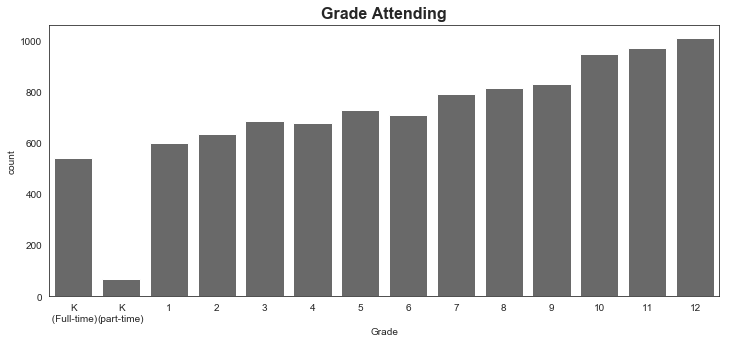

In [59]:
rcParams['figure.figsize'] = 12, 5
x_names = ['K\n (Full-time)', 'K\n(part-time)', '1', '2', '3', '4', '5', '6', '7', '8','9', '10', '11', '12']
ax = sns.countplot(x='grade',data=pfi_df, color='dimgrey')
ax.set(xticklabels=x_names, xlabel='Grade')
plt.title('Grade Attending', fontsize=16)
plt.savefig("grade.png".format(f), bbox_inches='tight')
plt.show()

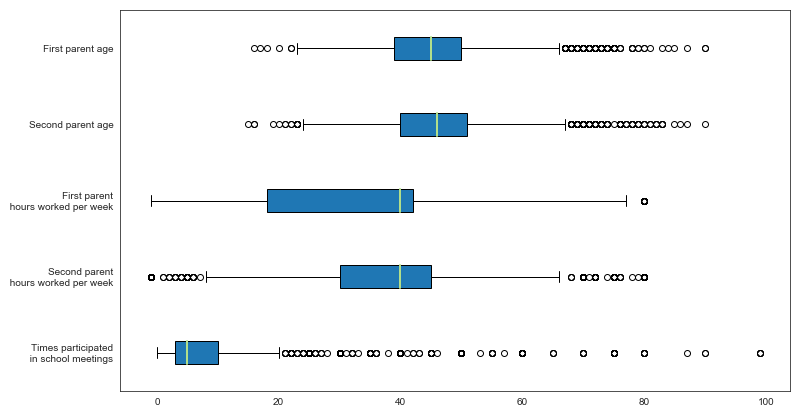

In [48]:
data_to_plot = [pfi_df['fsfreq'], pfi_df['P2HRSWK'], pfi_df['P1HRSWK'], pfi_df['P2AGE'], pfi_df['P1AGE']]
# Create a figure instance

fig = plt.figure(1, figsize=(12, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, patch_artist=True, widths=0.3, vert=False)
#bp = ax.boxplot(data_to_plot, widths=0.3)


# for box in bp['boxes']:
#     # change outline color
#     box.set( color='#7570b3', linewidth=2)
#     # change fill color
#     box.set( facecolor = '#1b9e77' )

# ## change color and linewidth of the whiskers
# for whisker in bp['whiskers']:
#     whisker.set(color='#7570b3', linewidth=2)

# ## change color and linewidth of the caps
# for cap in bp['caps']:
#     cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

# ## change the style of fliers and their fill
# for flier in bp['fliers']:
#     flier.set(marker='o', color='#e7298a', alpha=0.5)

## Custom x-axis labels
ax.set_yticklabels([ 'Times participated\n in school meetings','Second parent\n hours worked per week', 
                    'First parent\n hours worked per week', 'Second parent age', 'First parent age'])
plt.savefig("stats_summary1.png".format(f), bbox_inches='tight')
plt.show()

In [49]:
## add patch_artist=True option to ax.boxplot() 
## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [50]:
bp = ax.boxplot(data_to_plot, patch_artist=True)

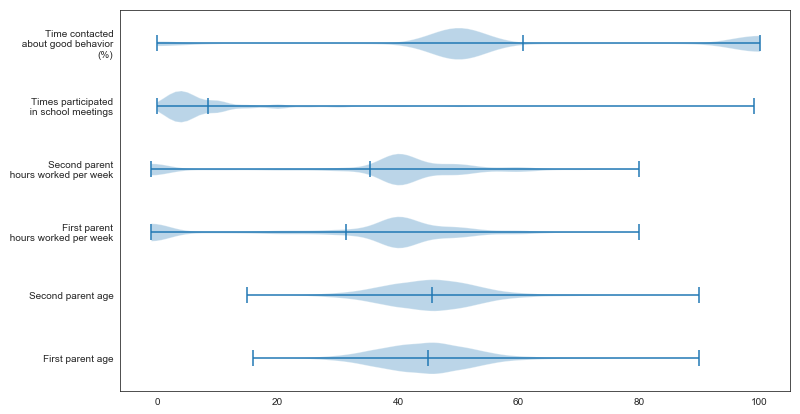

In [51]:
data_to_plot = [pfi_df['P1AGE'],pfi_df['P2AGE'], pfi_df['P1HRSWK'], pfi_df['P2HRSWK'], pfi_df['fsfreq'], pfi_df['percbehav']]
# Create a figure instance
fig = plt.figure(1, figsize=(12, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
#bp = ax.boxplot(data_to_plot, patch_artist=True)
bp = ax.violinplot(data_to_plot, showmeans=True, showextrema=True, vert=False)

plt.setp(ax, yticks=[y+1 for y in range(len(data_to_plot))],
         yticklabels=['First parent age', 'Second parent age', 
                    'First parent\n hours worked per week', 'Second parent\n hours worked per week',
                     'Times participated\n in school meetings', 'Time contacted\n about good behavior\n(%)'])
plt.show()

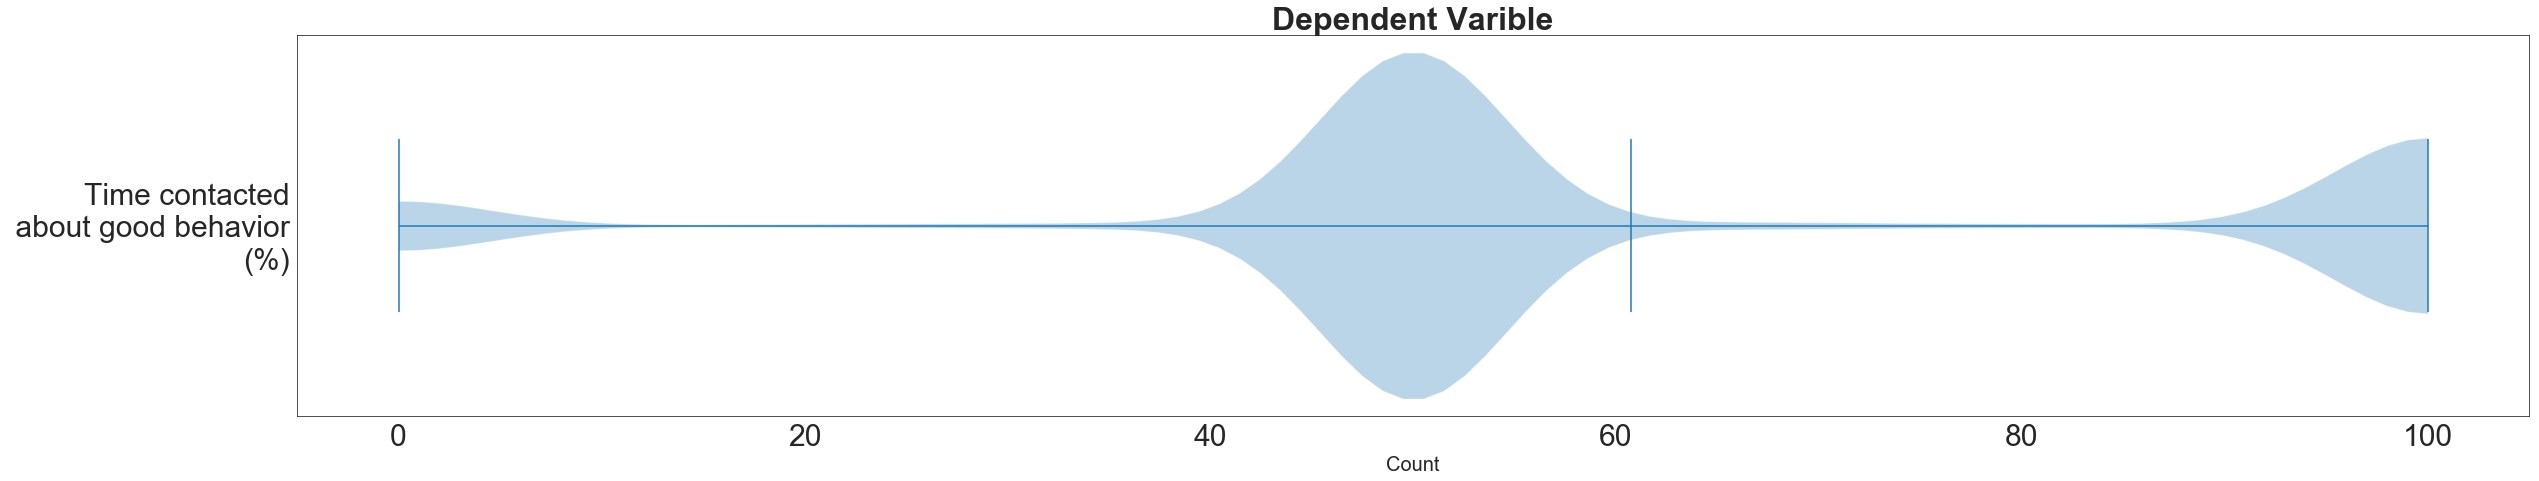

In [52]:
data_to_plot = [pfi_df['percbehav']]
# Create a figure instance
fig = plt.figure(1, figsize=(40, 7))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
#bp = ax.boxplot(data_to_plot, patch_artist=True)
bp = ax.violinplot(data_to_plot, showmeans=True, showextrema=True, vert=False)
# bp = ax.boxplot(data_to_plot, patch_artist=True, widths=0.3, vert=False)

plt.setp(ax, yticks=[y+1 for y in range(len(data_to_plot))],
         yticklabels=['Time contacted\n about good behavior\n(%)'])
plt.tick_params(labelsize=30)
plt.xlabel('Count', fontsize=20)
plt.rcParams['axes.titleweight'] = 'bold'
plt.title('Dependent Varible', fontsize=32)
fig.savefig('ind_var.png', bbox_inches='tight')
plt.show()

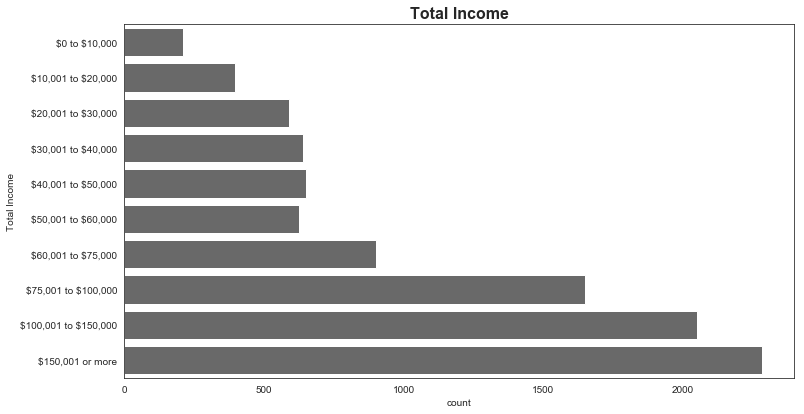

In [53]:
plt.figure(figsize=(12,6.5))
names = ['\$0 to $10,000', '\$10,001 to $20,000', '\$20,001 to $30,000', '\$30,001 to $40,000',
         '\$40,001 to $50,000','\$50,001 to $60,000','\$60,001 to $75,000','\$75,001 to $100,000',
         '\$100,001 to $150,000','\$150,001 or more']
ax = sns.countplot(y="ttlhhinc", data=pfi_df, color='dimgrey')
ax.set(yticklabels=names, ylabel='Total Income')
plt.title('Total Income', fontsize=16)
plt.savefig("total_income.png".format(f), bbox_inches='tight')
plt.show()

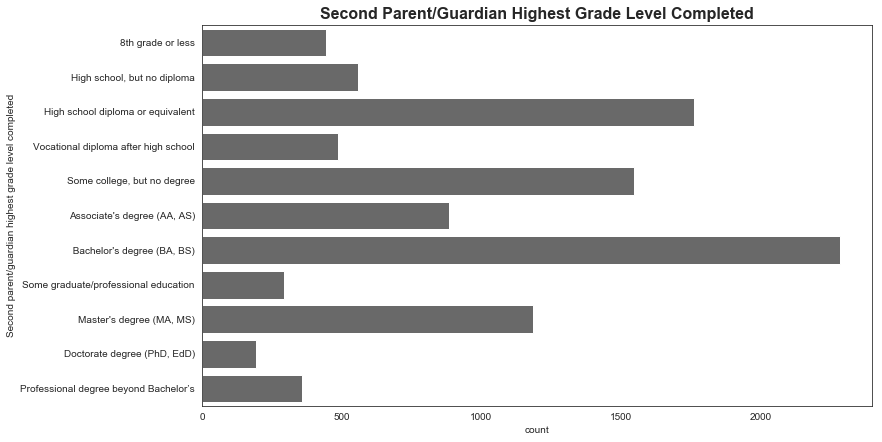

In [54]:
plt.figure(figsize=(12,7))
names = ['8th grade or less', 'High school, but no diploma', 'High school diploma or equivalent', 
         'Vocational diploma after high school',
         'Some college, but no degree','Associate\'s degree (AA, AS)',' Bachelor\'s degree (BA, BS)',
         'Some graduate/professional education', 'Master\'s degree (MA, MS)','Doctorate degree (PhD, EdD)', 
         'Professional degree beyond Bachelor’s']
ax = sns.countplot(y="P2EDUC", data=pfi_df, color='dimgrey')
ax.set(yticklabels=names, ylabel='Second parent/guardian highest grade level completed')
plt.title('Second Parent/Guardian Highest Grade Level Completed', fontsize=16)
plt.savefig("p2educ.png".format(f), bbox_inches='tight')
plt.show()

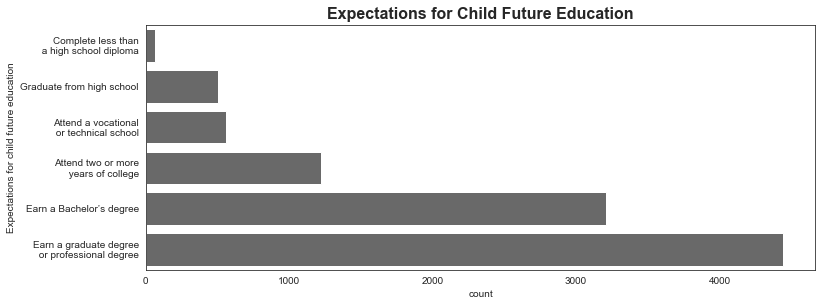

In [55]:
plt.figure(figsize=(12,4.5))
names = ['Complete less than\n a high school diploma', 'Graduate from high school',
        'Attend a vocational\n or technical school', 'Attend two or more\n years of college',
        'Earn a Bachelor’s degree', 'Earn a graduate degree\n or professional degree']
ax = sns.countplot(y="sefuturex", data=pfi_df, color='dimgrey')
ax.set(yticklabels=names, ylabel='Expectations for child future education')
plt.title('Expectations for Child Future Education', fontsize=16)
plt.savefig("expx.png".format(f), bbox_inches='tight')
plt.show()

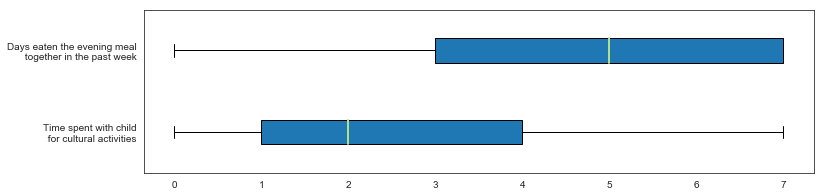

In [56]:
data_to_plot = [pfi_df['culactiv'],pfi_df['fodinnerx']]
# Create a figure instance
fig = plt.figure(1, figsize=(12, 3))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data_to_plot, widths=0.3,patch_artist=True, vert=False)
# bp = ax.boxplot(data_to_plot)
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

ax.set_yticklabels(['Time spent with child\n for cultural activities','Days eaten the evening meal\n together in the past week'])
plt.savefig("stats_summary2.png".format(f), bbox_inches='tight')
plt.show()

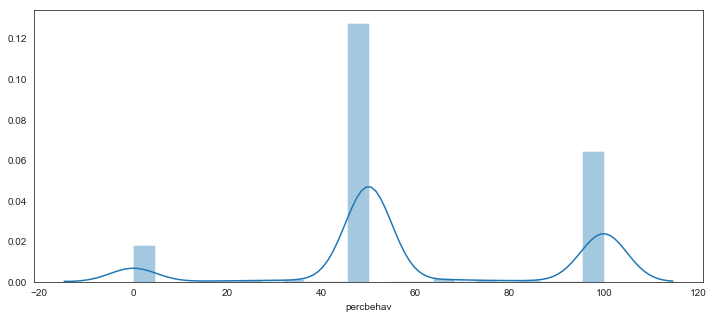

In [57]:
sns.distplot(pfi_df['percbehav']);